In [2]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(DescTools)
options(repr.plot.width = 12, repr.plot.height = 8)

# Wilson

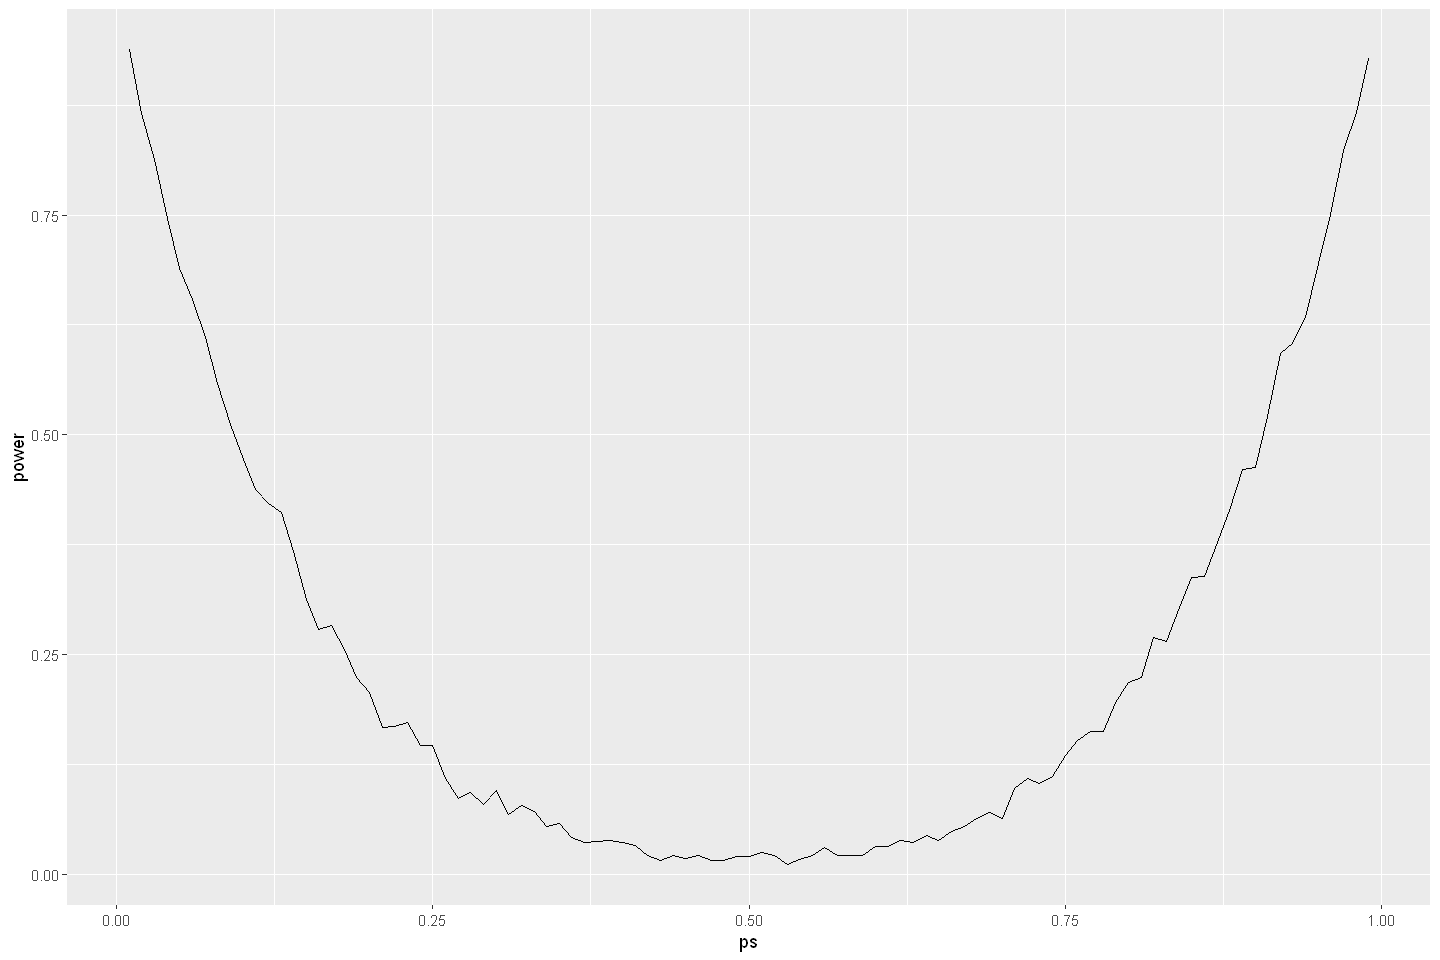

In [6]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

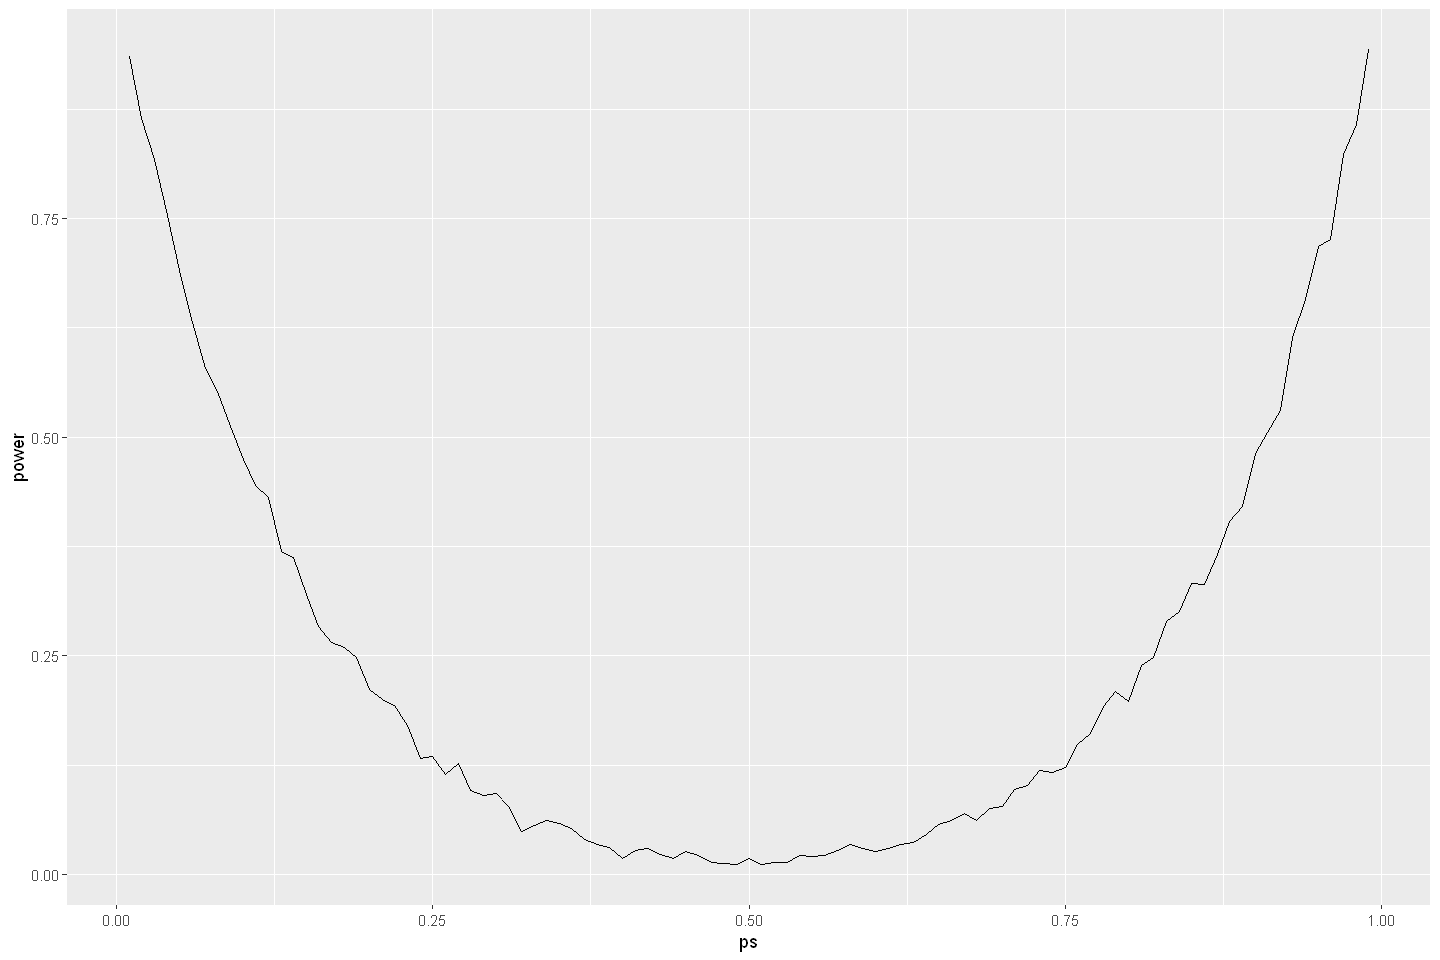

In [5]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="wilson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Clopper-Pearson

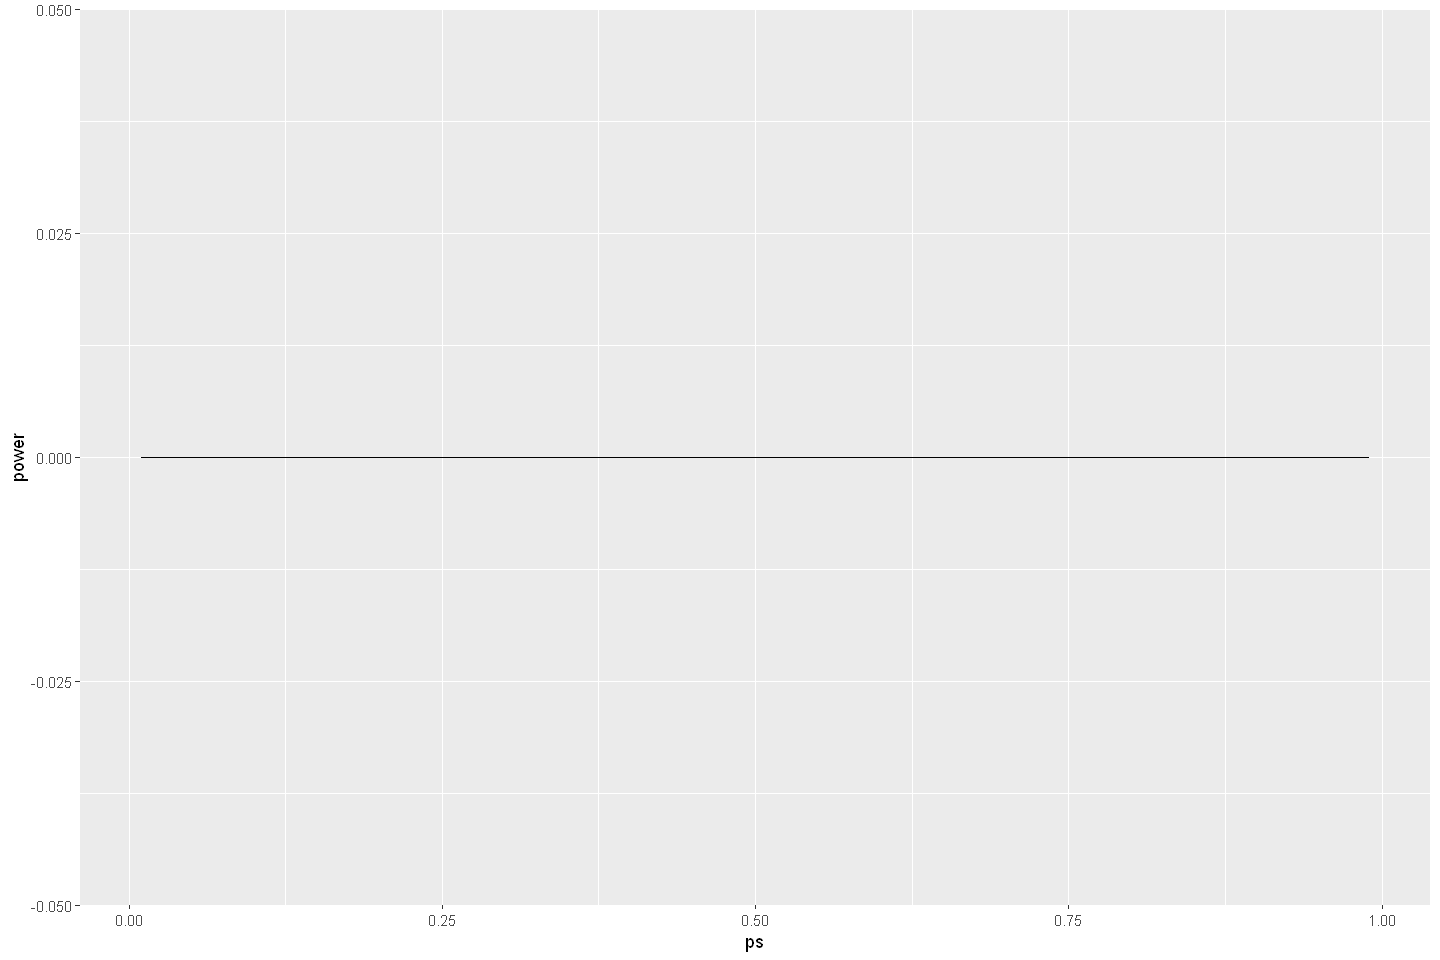

In [13]:
n <- 5
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    #tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2 
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

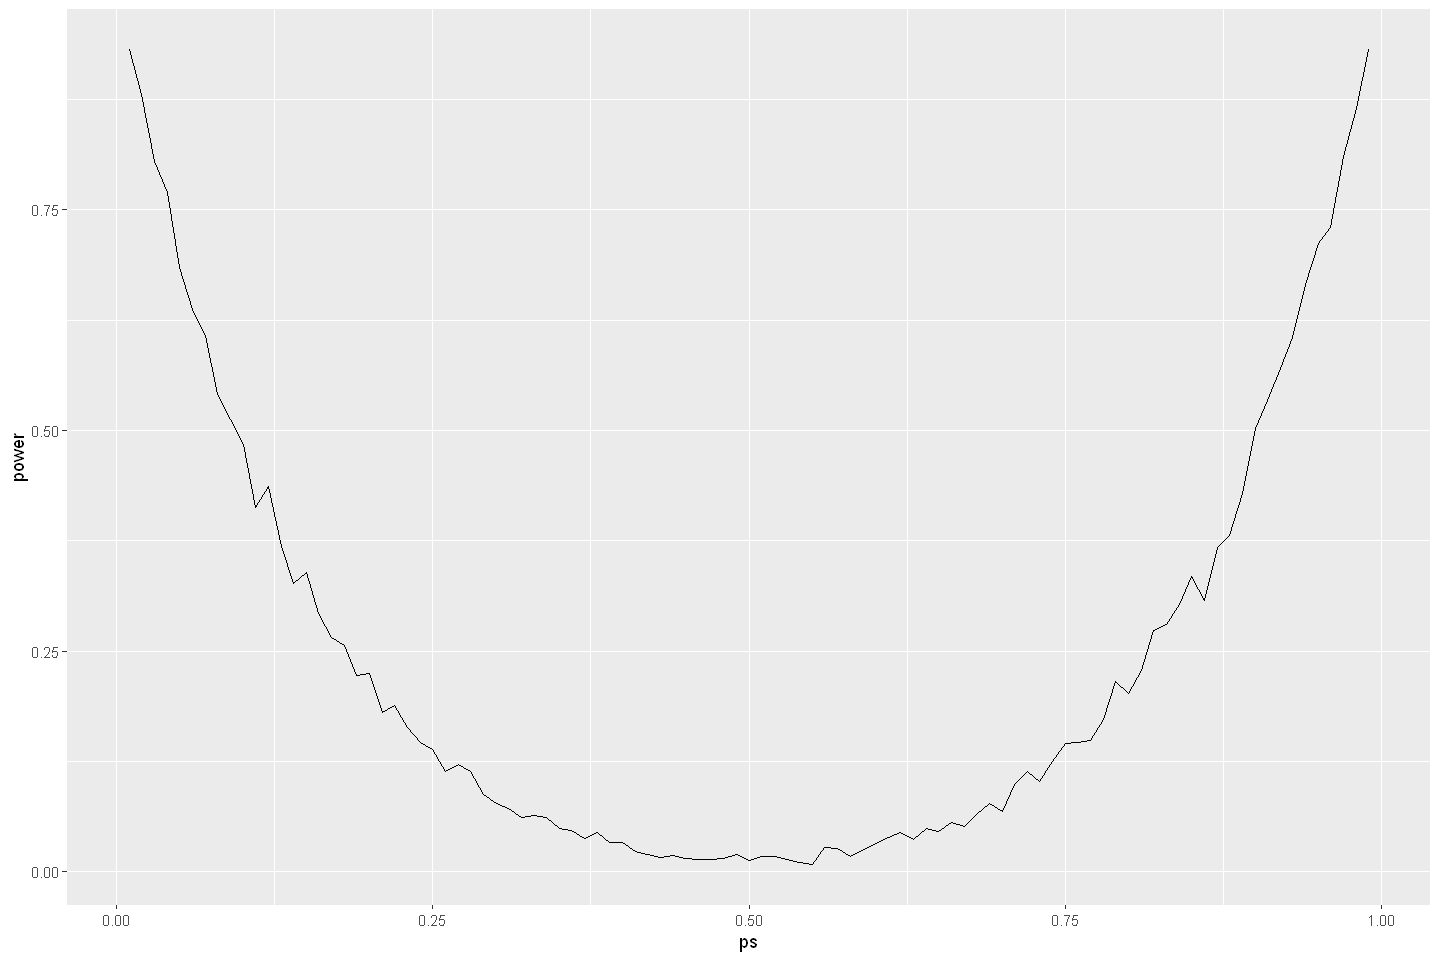

In [34]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="clopper-pearson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Jeffreys

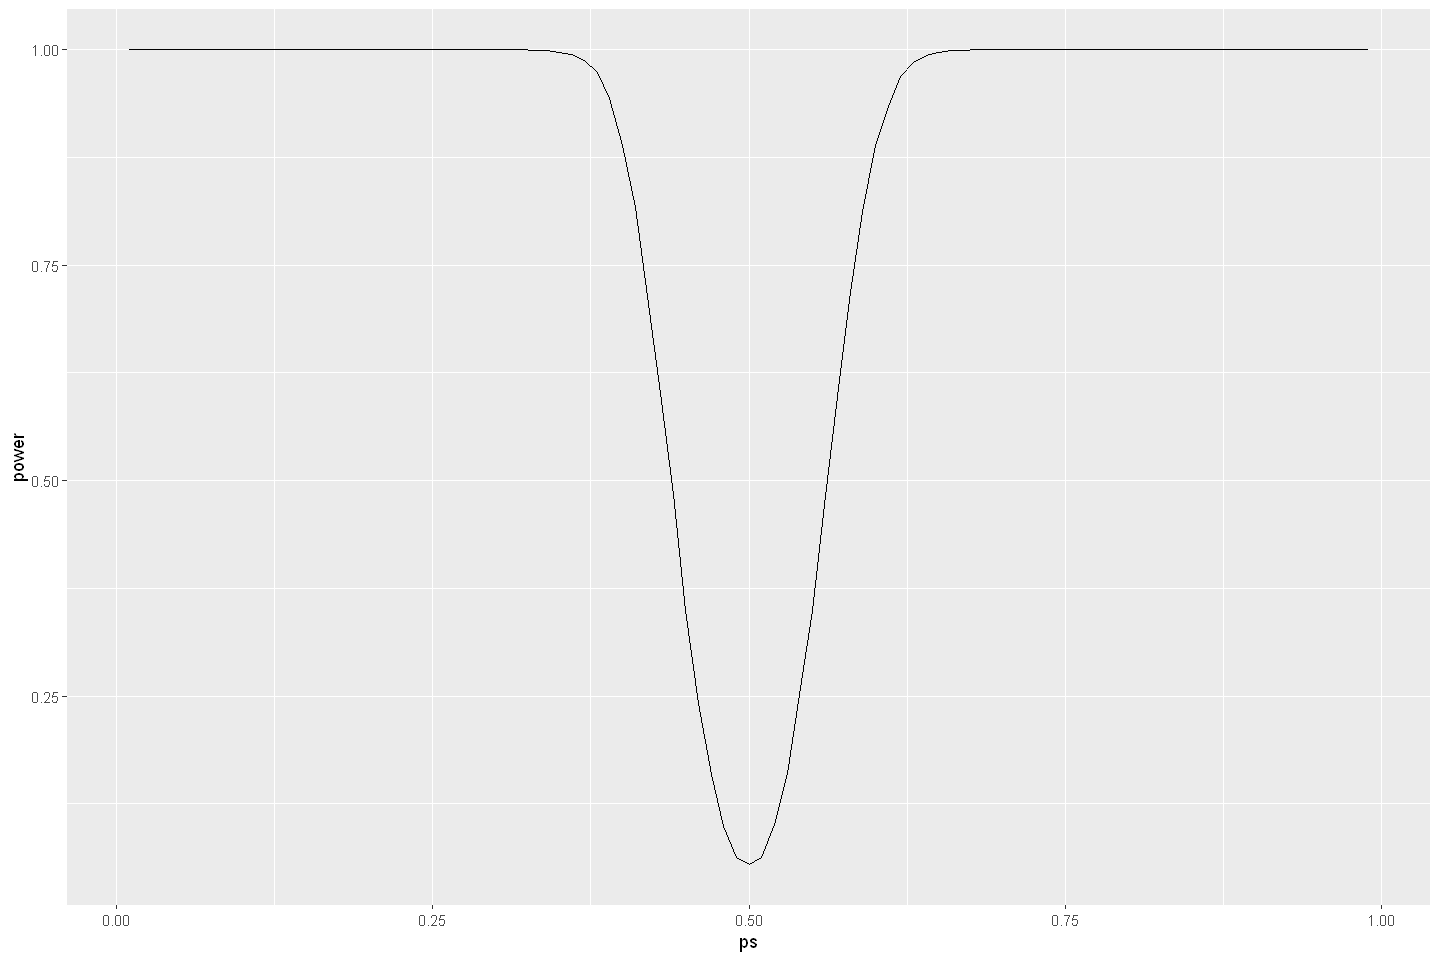

In [81]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

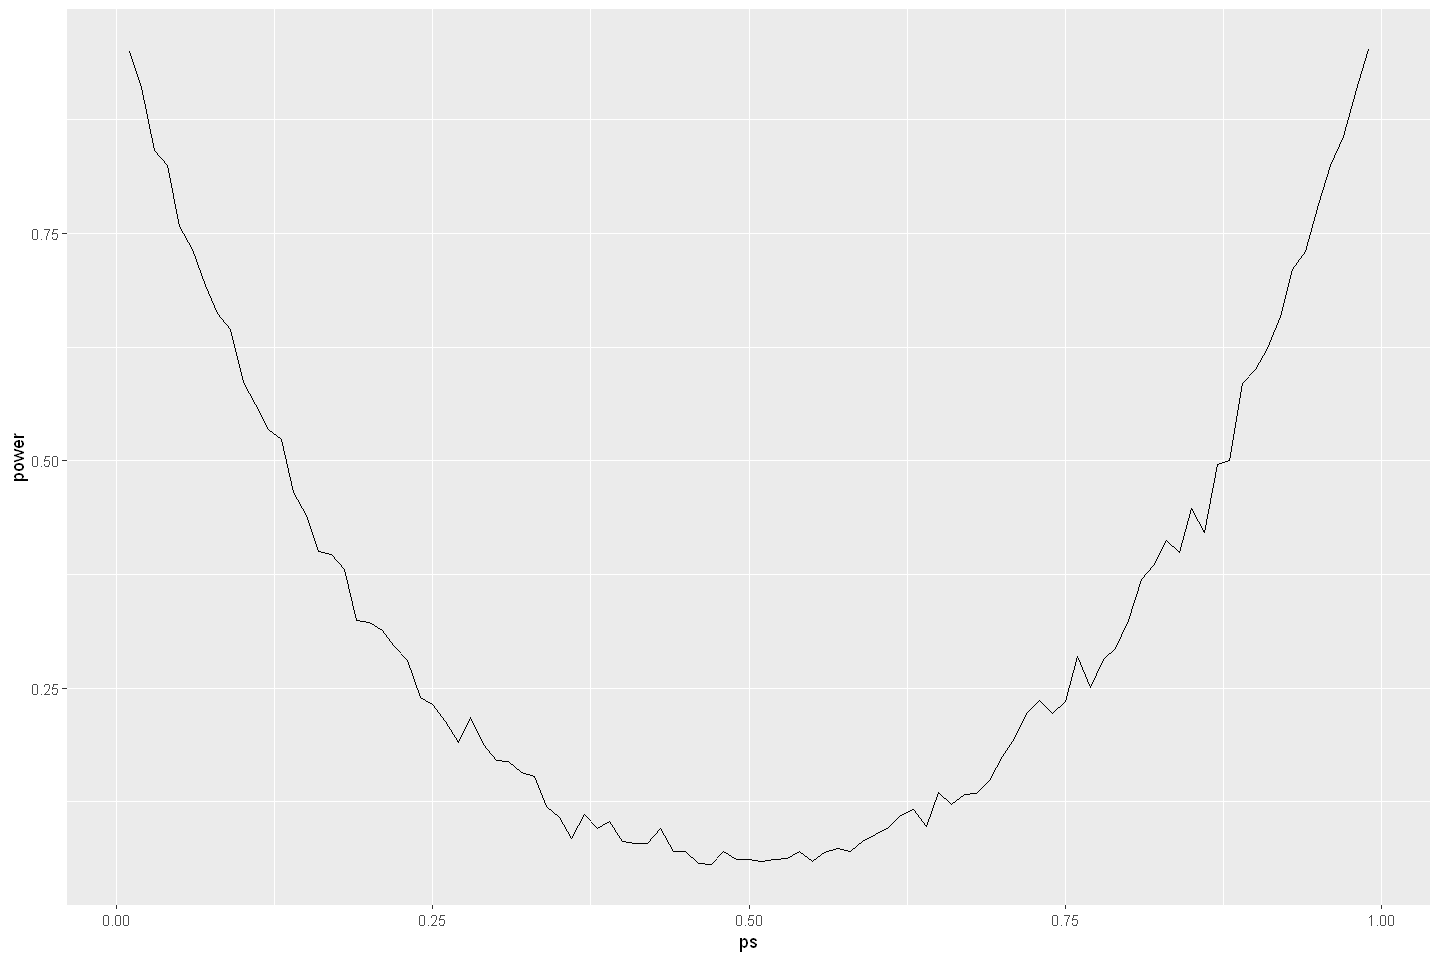

In [12]:
n <- 5
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)
power <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    intervals <- BinomCI(S, n, method="jeffreys")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power <- append(power, 1 - sum(tests) / N)
}

ggplot() + geom_line(aes(ps, power))

# Porównanie złe

### $n = 7$

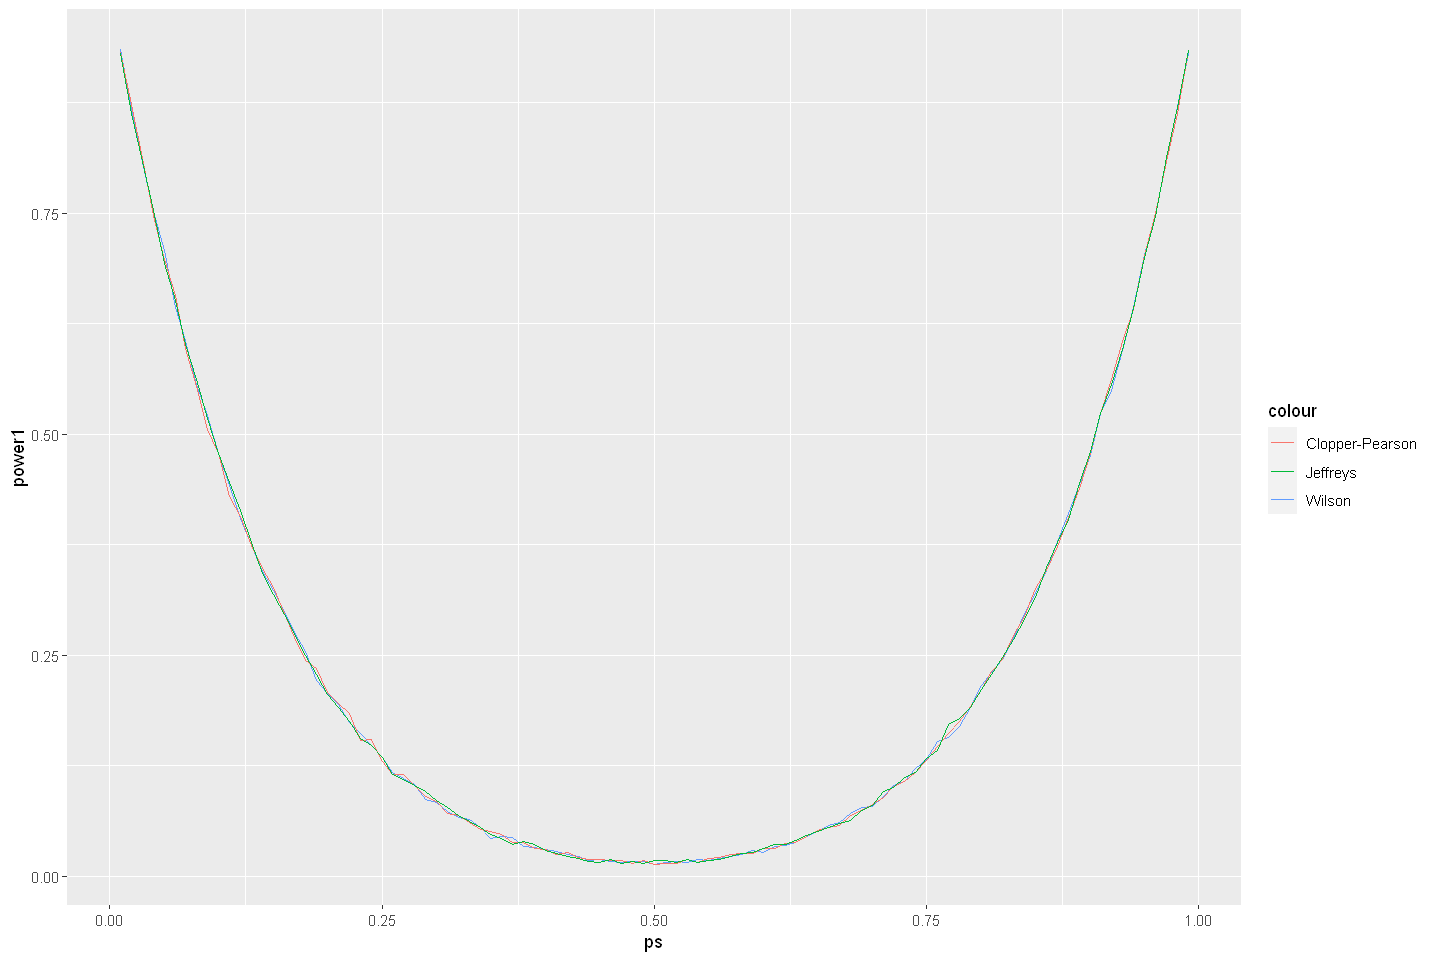

In [35]:
n <- 7
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

# Wilson
power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

# Clopper-Pearson
power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2
    power2 <- append(power2, 1 - sum(tests) / N)
}

# Jeffreys
power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

### $n = 35$

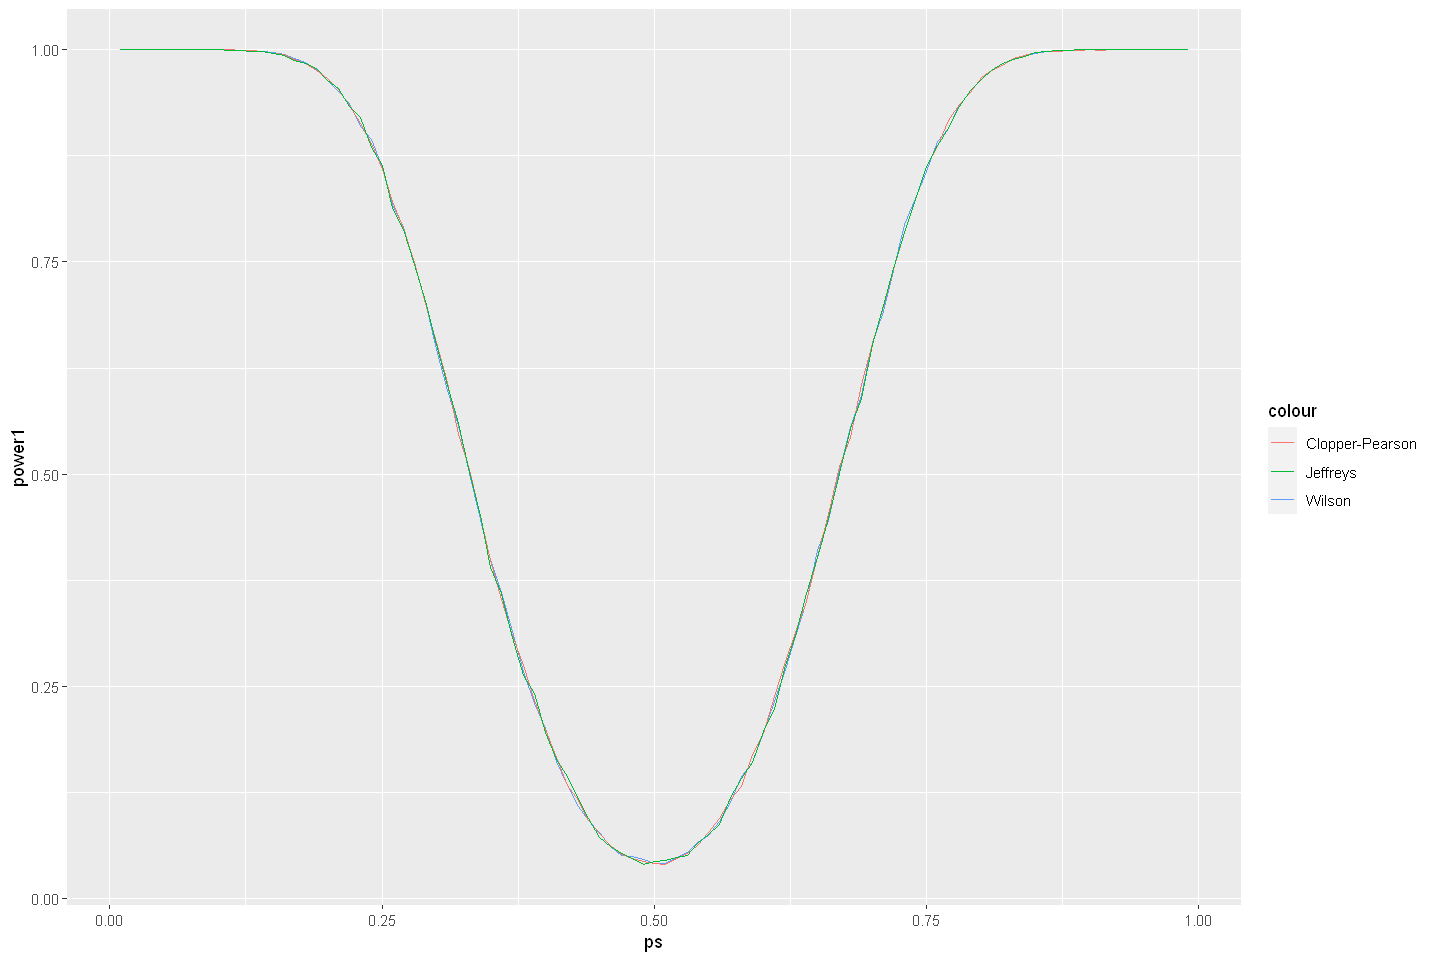

In [36]:
n <- 35
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

# Wilson
power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

# Clopper-Pearson
power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  dbinom(S, size=n, prob=p0) + pbinom(S, size=n, prob=p0, lower.tail=FALSE) > alpha/2
    power2 <- append(power2, 1 - sum(tests) / N)
}

# Jeffreys
power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

### $n = 250$

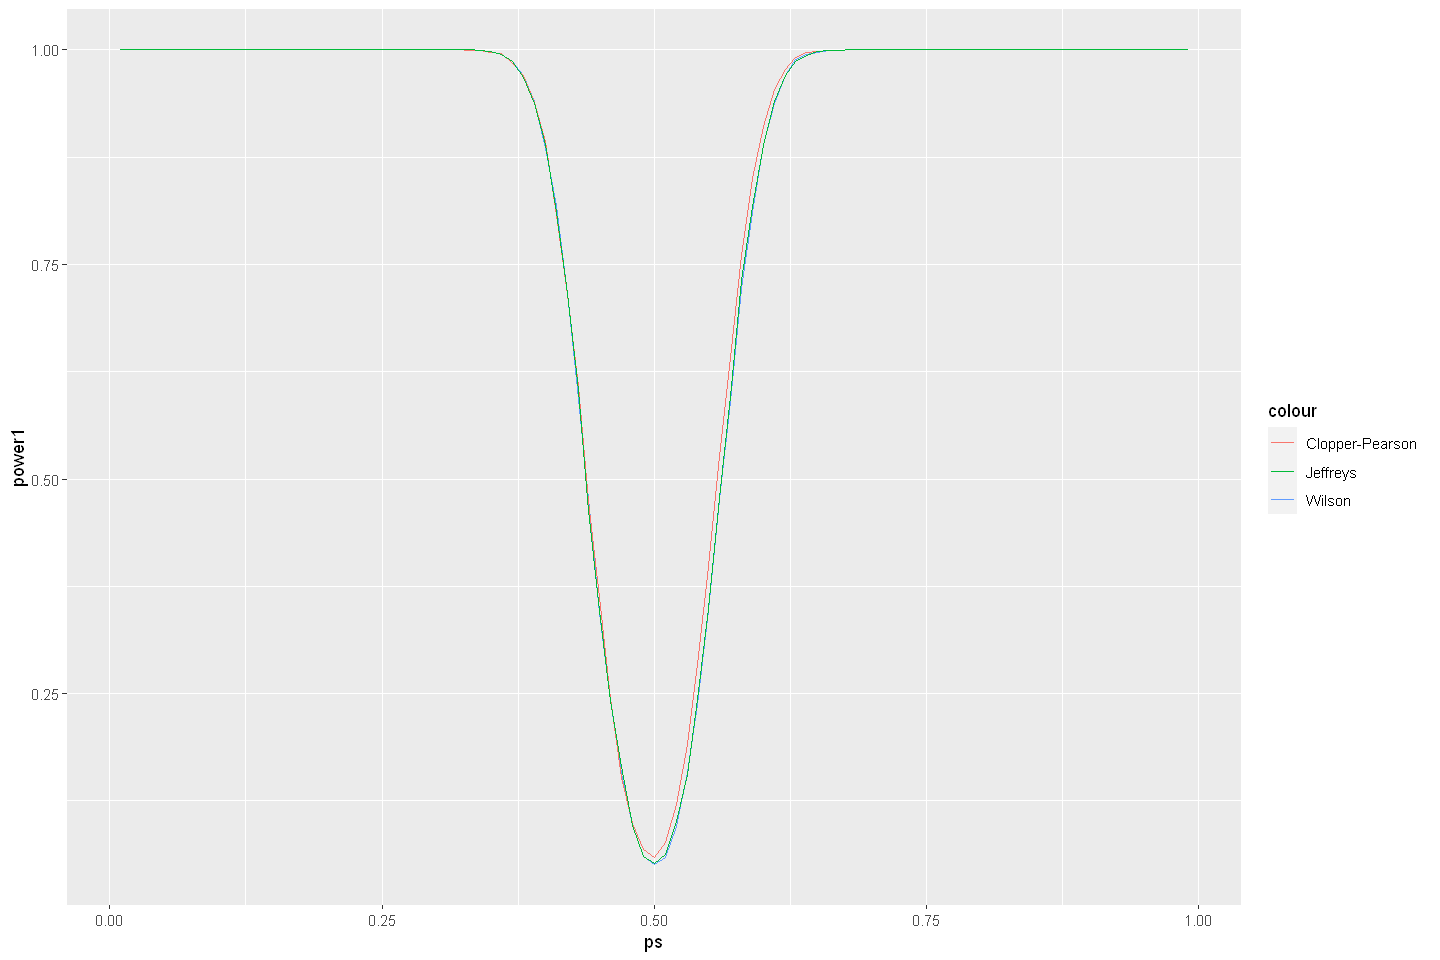

In [37]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    z <- qnorm(1 - alpha/2)
    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)
}

power2 <- c()
for (p in ps) {
    S <- rbinom(N, size=n, prob=p)
    tests <- pbinom(S, size=n, prob=p0) > alpha/2  &  1 - pbinom(S, size=n, prob=p0) > alpha/2 
    power2 <- append(power2, 1 - sum(tests) / N)
}

power3 <- c()
for (p in ps) {
    S <- rbinom(N, prob=p, size=n)
    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

# Porównanie dobre

### $n = 7$

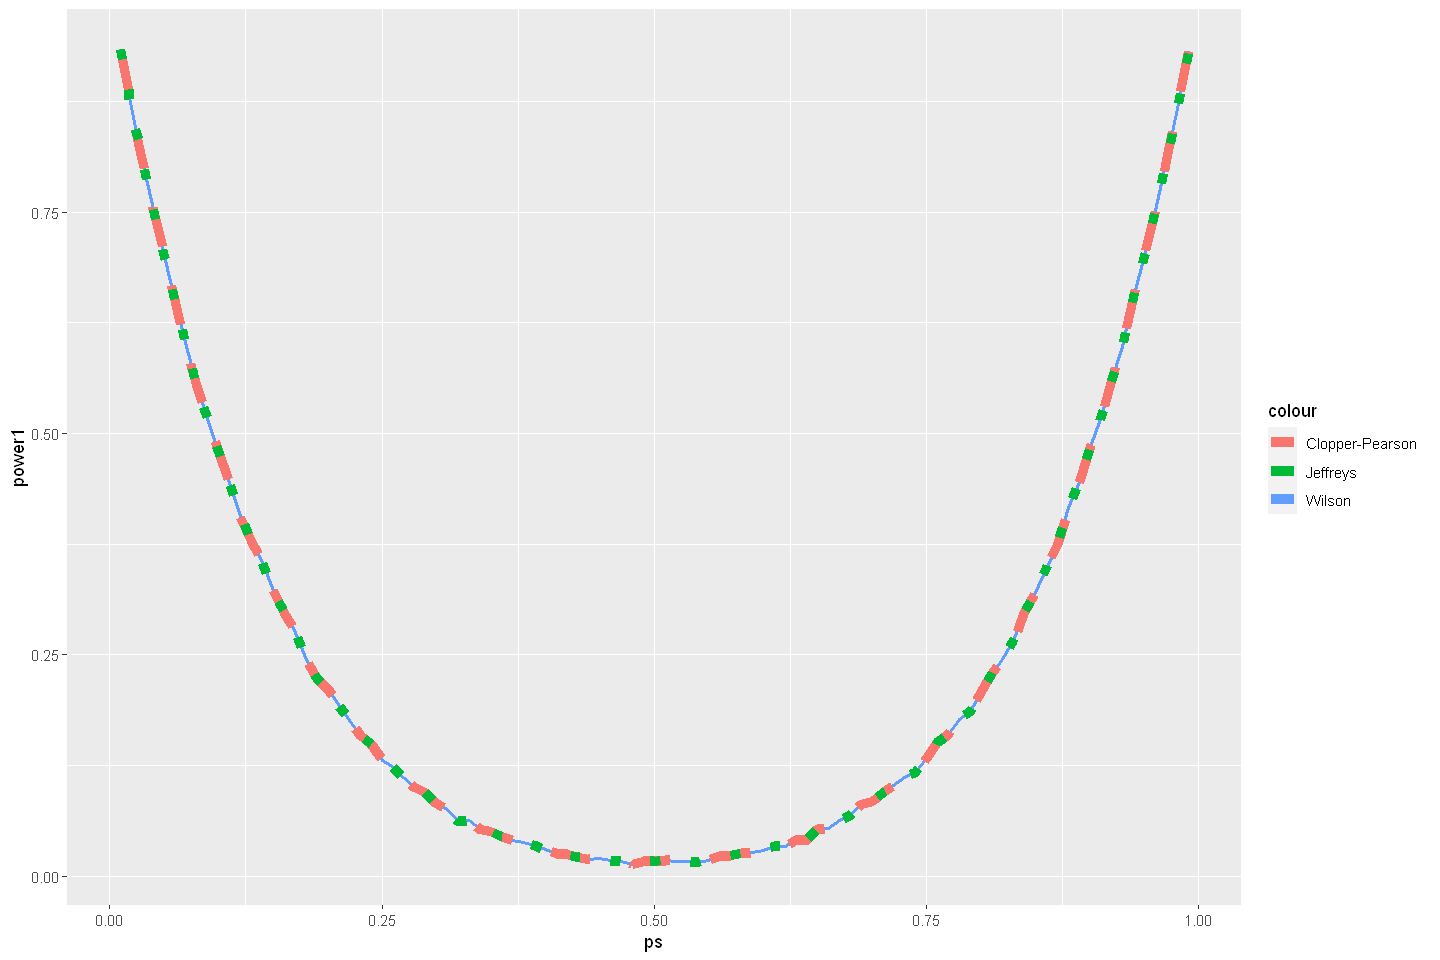

In [4]:
n <- 7
p0 <- 0.5
alpha <- 0.05
z <- qnorm(1 - alpha/2)
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    power2 <- append(power2, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson"), linewidth=1) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson"), linetype="dashed", linewidth=3) +
  geom_line(aes(ps, power3, col="Jeffreys"), linetype="dotted", linewidth=3)

### $n = 35$

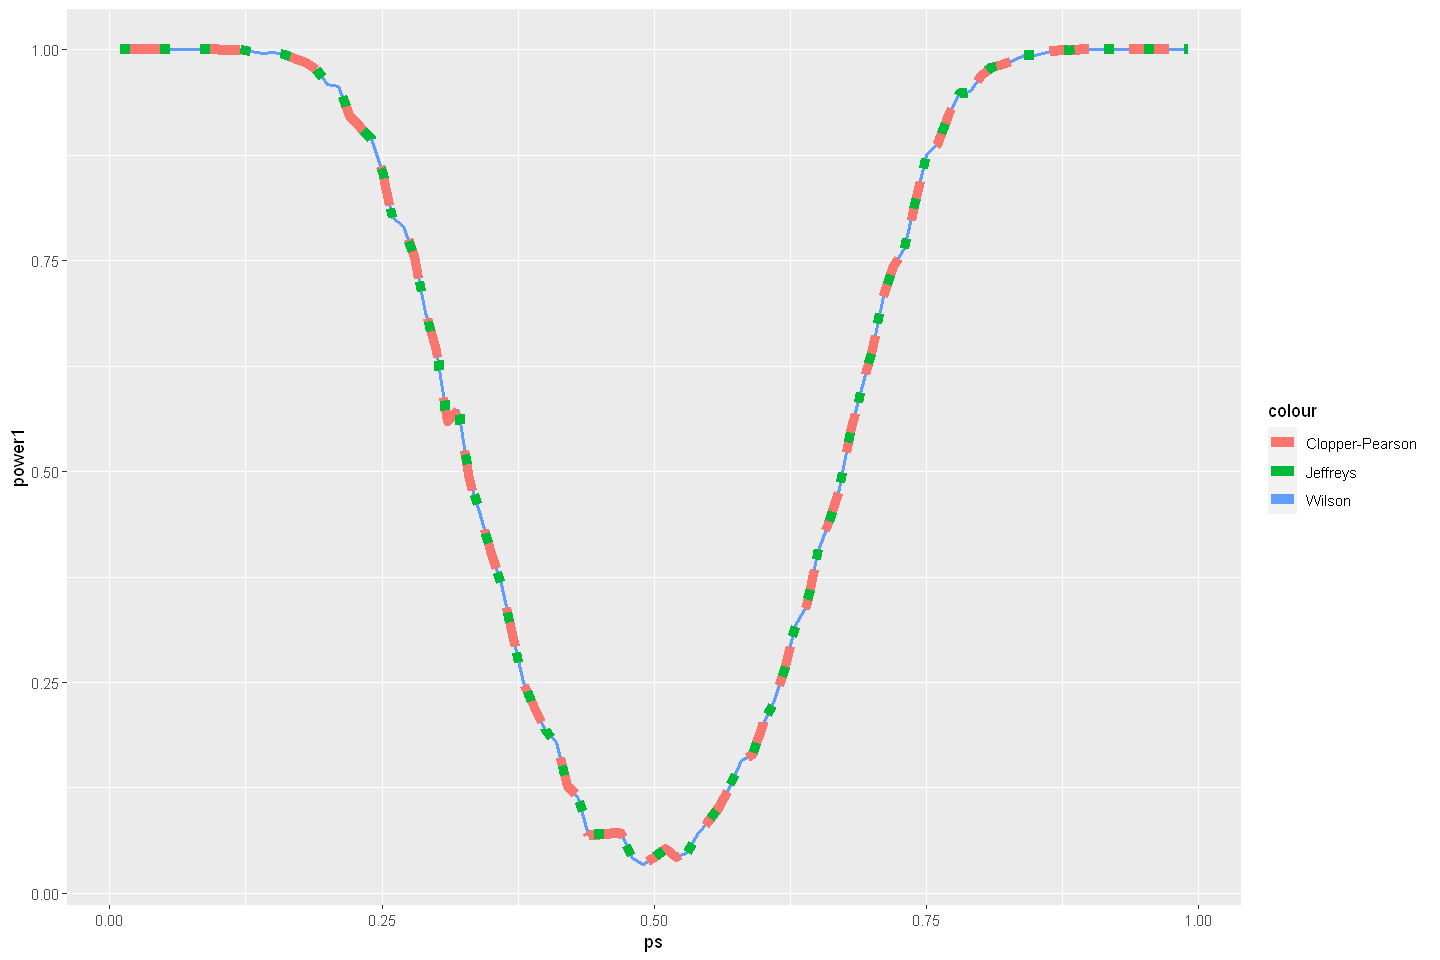

In [5]:
n <- 35
p0 <- 0.5
alpha <- 0.05
z <- qnorm(1 - alpha/2)
N <- 1000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    power2 <- append(power2, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson"), linewidth=1) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson"), linetype="dashed", linewidth=3) +
  geom_line(aes(ps, power3, col="Jeffreys"), linetype="dotted", linewidth=3)

### $n = 250$

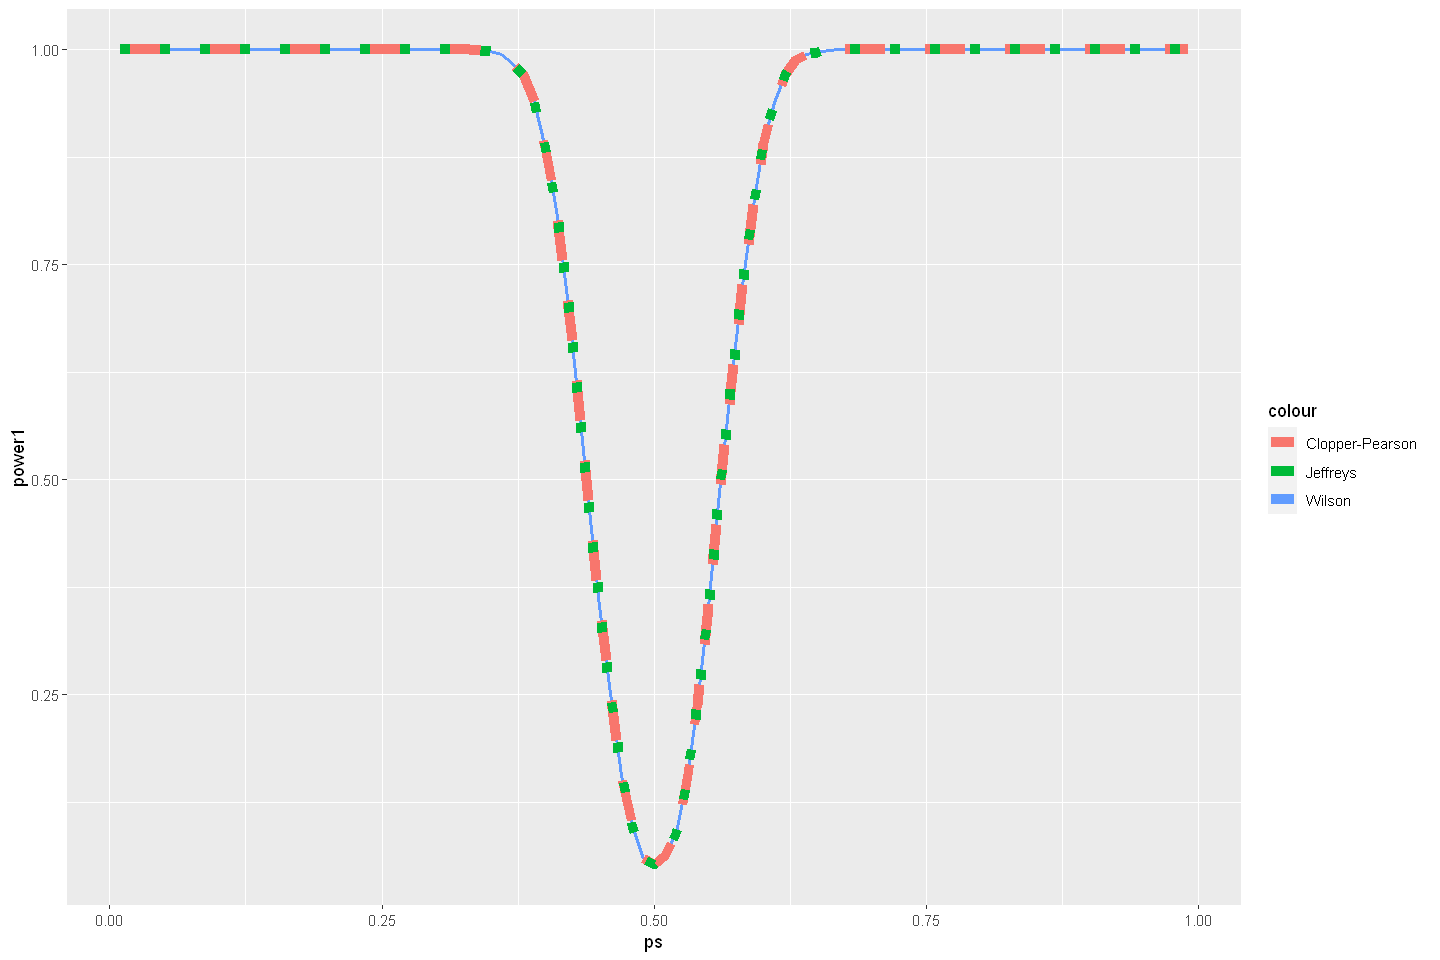

In [59]:
n <- 250
p0 <- 0.5
alpha <- 0.05
z <- qnorm(1 - alpha/2)
N <- 10000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    tests <- (S + 1/2 * z^2) / (n + z^2)  -  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4) < p0 & p0 < (S + 1/2 * z^2) / (n + z^2)  +  z / (n + z^2) * sqrt(S * (n - S) / n + z^2 / 4)
    power1 <- append(power1, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S, n - S + 1) < p0  &  p0 < qbeta(1 - alpha/2, S + 1, n - S)
    power2 <- append(power2, 1 - sum(tests) / N)

    tests <- qbeta(alpha/2, S + 0.5, n - S + 0.5) < p0  &  p0 < qbeta(1 - alpha/2, S + 0.5, n - S + 0.5)
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson"), linewidth=1) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson"), linetype="dashed", linewidth=3) +
  geom_line(aes(ps, power3, col="Jeffreys"), linetype="dotted", linewidth=3)

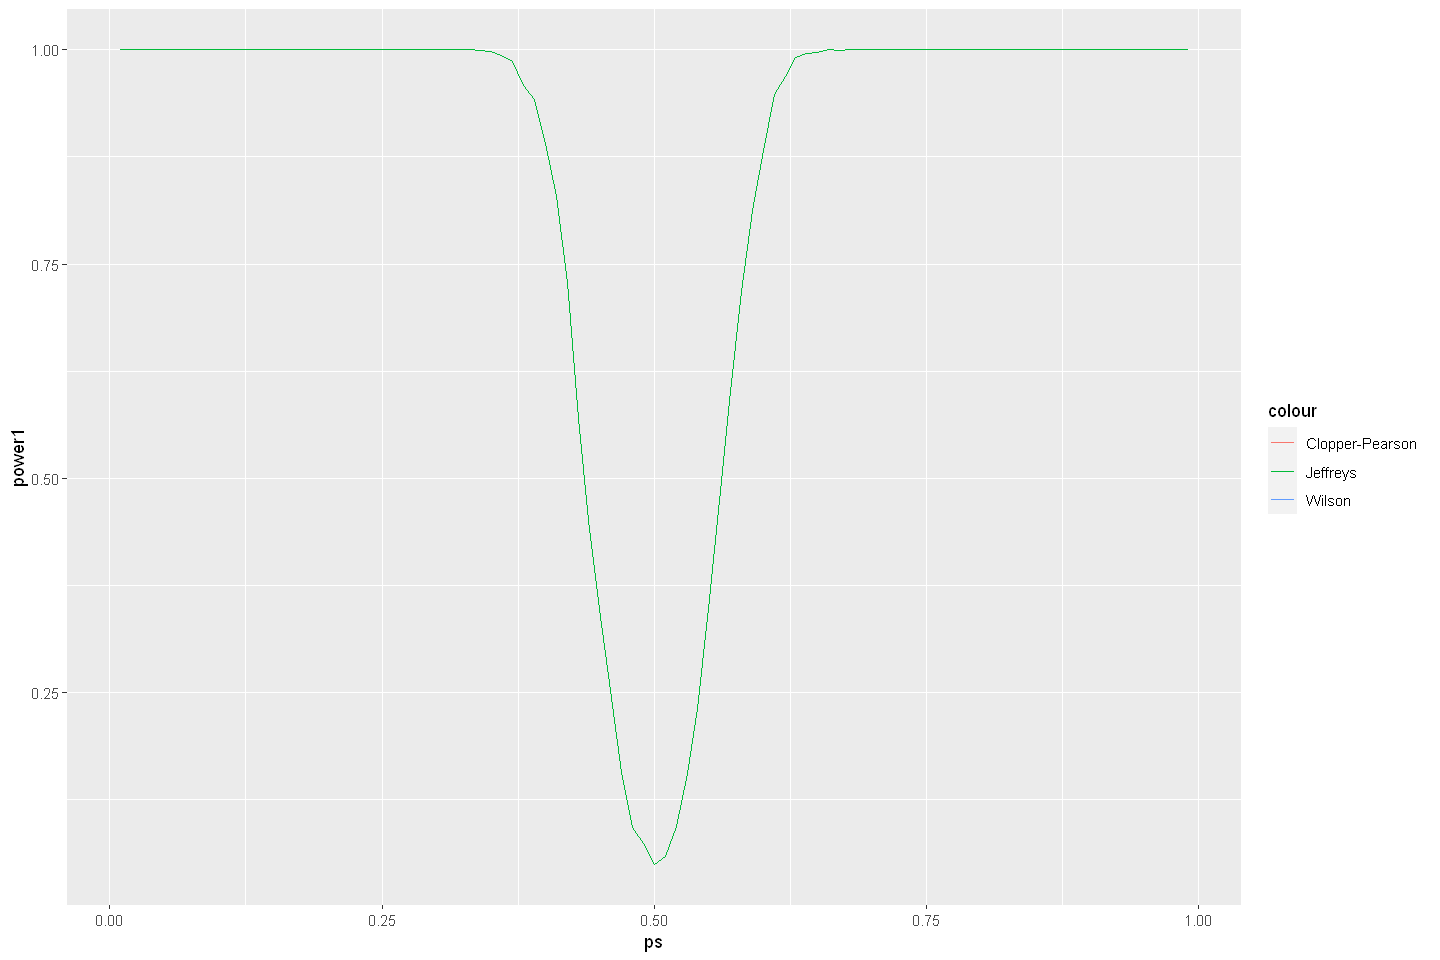

In [32]:
n <- 250
p0 <- 0.5
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    intervals <- BinomCI(S, n, method="wilson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power1 <- append(power1, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="clopper-pearson")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power2 <- append(power2, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="jeffreys")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

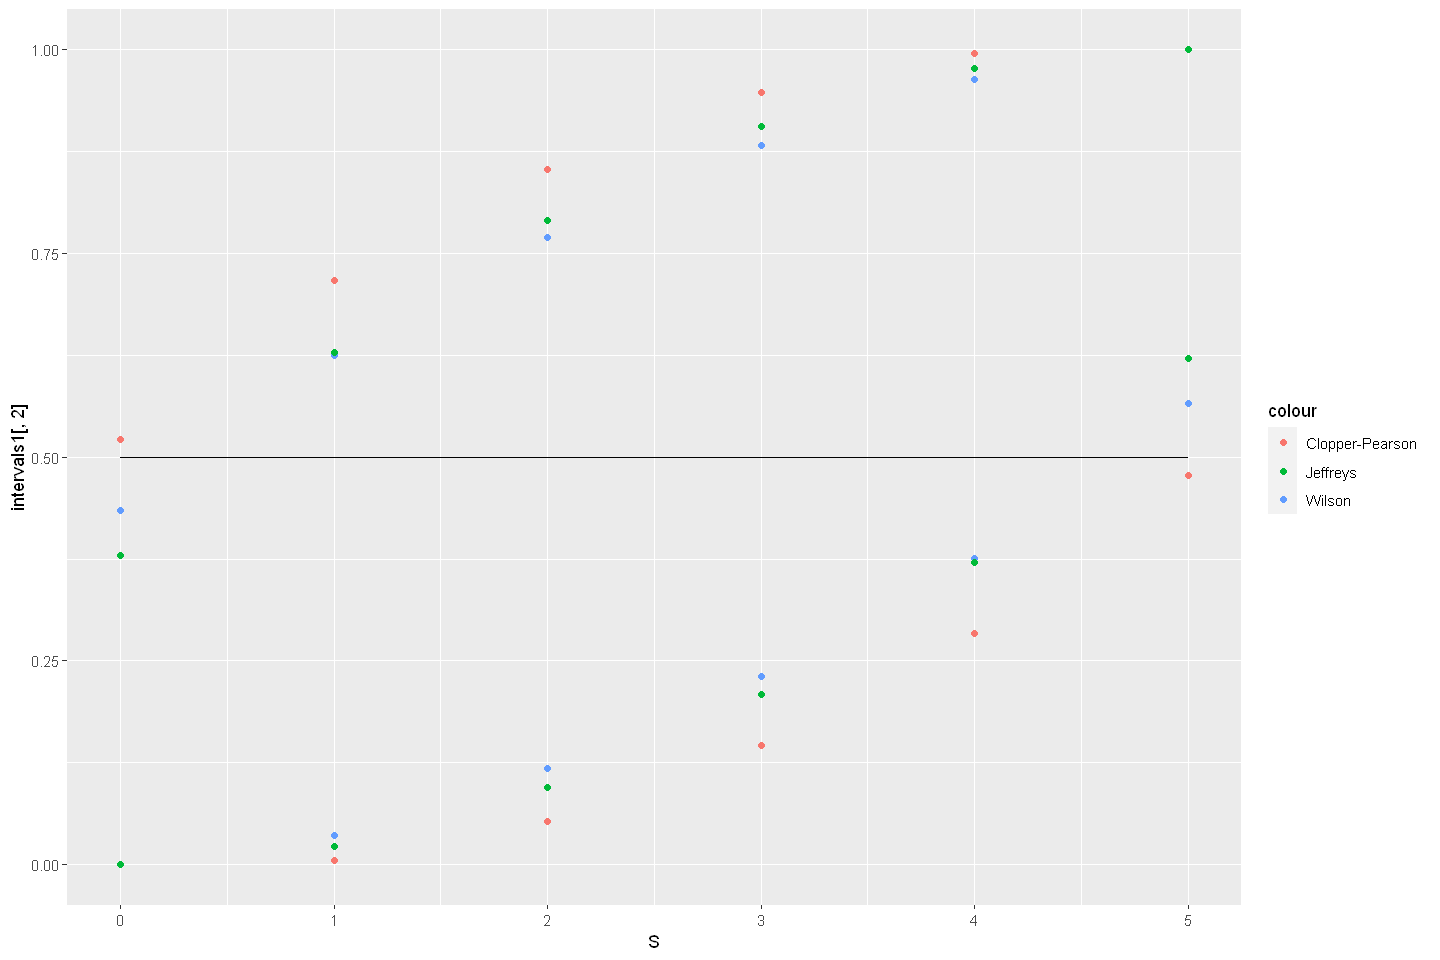

In [14]:
n <- 5
alpha <- 0.05
S <- 0:n

intervals1 <- BinomCI(S, n, method="wilson")
intervals2 <- BinomCI(S, n, method="clopper-pearson")
intervals3 <- BinomCI(S, n, method="jeffreys")

ggplot() +
  geom_point(aes(S, intervals1[,2], col="Wilson")) + geom_point(aes(S, intervals1[,3], col="Wilson")) +
  geom_point(aes(S, intervals2[,2], col="Clopper-Pearson")) + geom_point(aes(S, intervals2[,3], col="Clopper-Pearson")) +
  geom_point(aes(S, intervals3[,2], col="Jeffreys")) + geom_point(aes(S, intervals3[,3], col="Jeffreys")) +
  geom_line(aes(S, 0.5))

# Hipoteza jednostronna

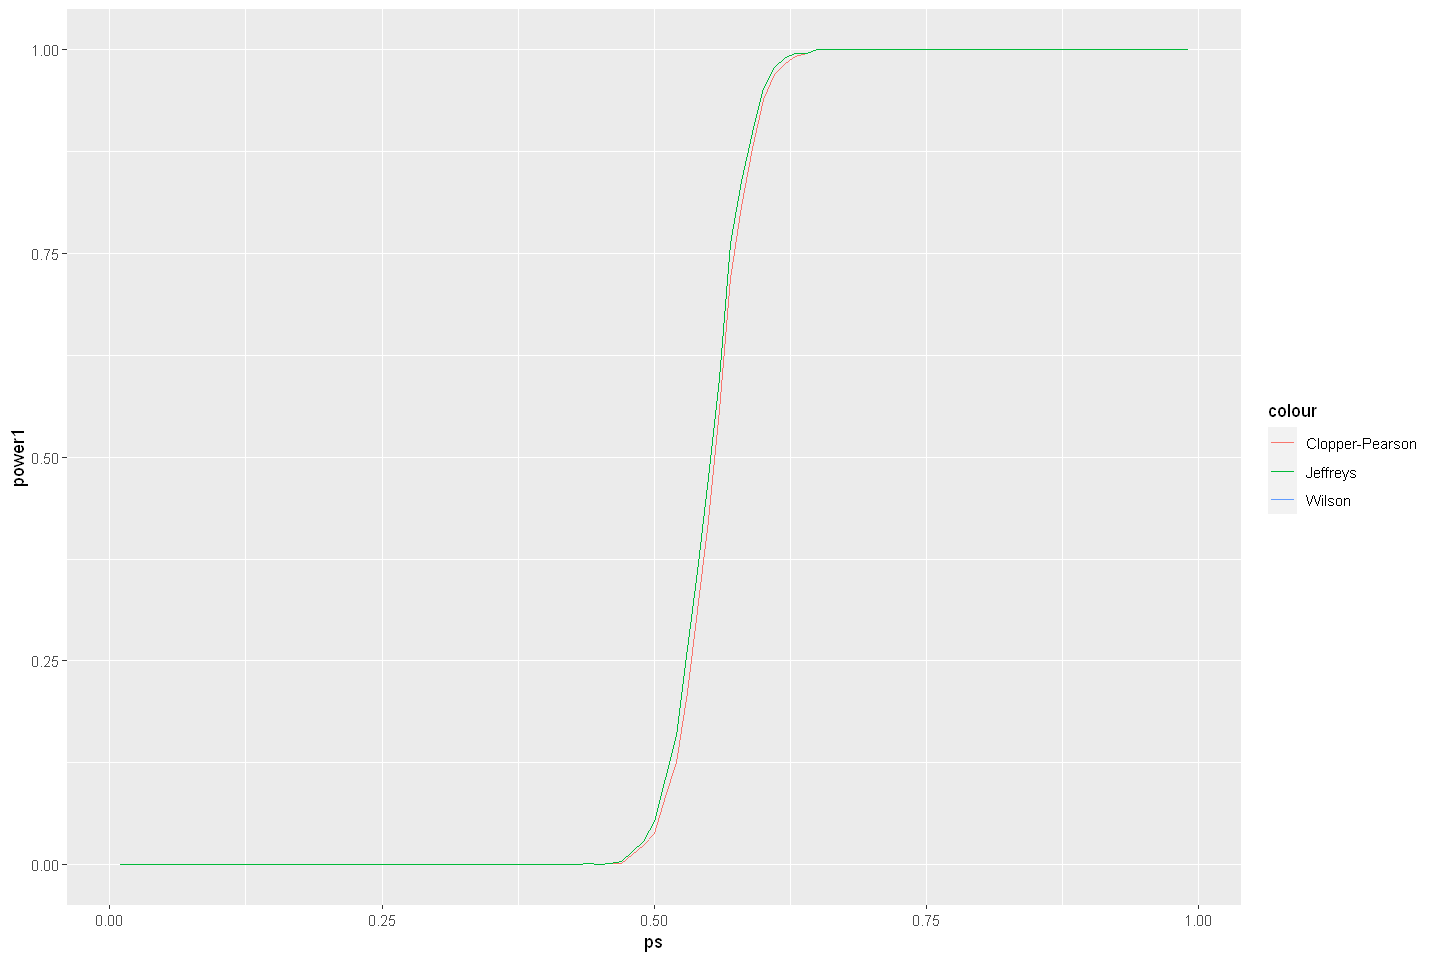

In [47]:
n <- 5
p0 <- 0.2
alpha <- 0.05
N <- 1000
ps <- seq(0.01, 0.99, 0.01)

power1 <- c()
power2 <- c()
power3 <- c()

for (p in ps) {
    S <- rbinom(N, prob=p, size=n)

    intervals <- BinomCI(S, n, method="wilson", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power1 <- append(power1, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="clopper-pearson", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power2 <- append(power2, 1 - sum(tests) / N)

    intervals <- BinomCI(S, n, method="jeffreys", sides="left")
    tests <- intervals[,2] < p0  &  p0 < intervals[,3]
    power3 <- append(power3, 1 - sum(tests) / N)
}

ggplot() + 
  geom_line(aes(ps, power1, col="Wilson")) + 
  geom_line(aes(ps, power2, col="Clopper-Pearson")) +
  geom_line(aes(ps, power3, col="Jeffreys"))

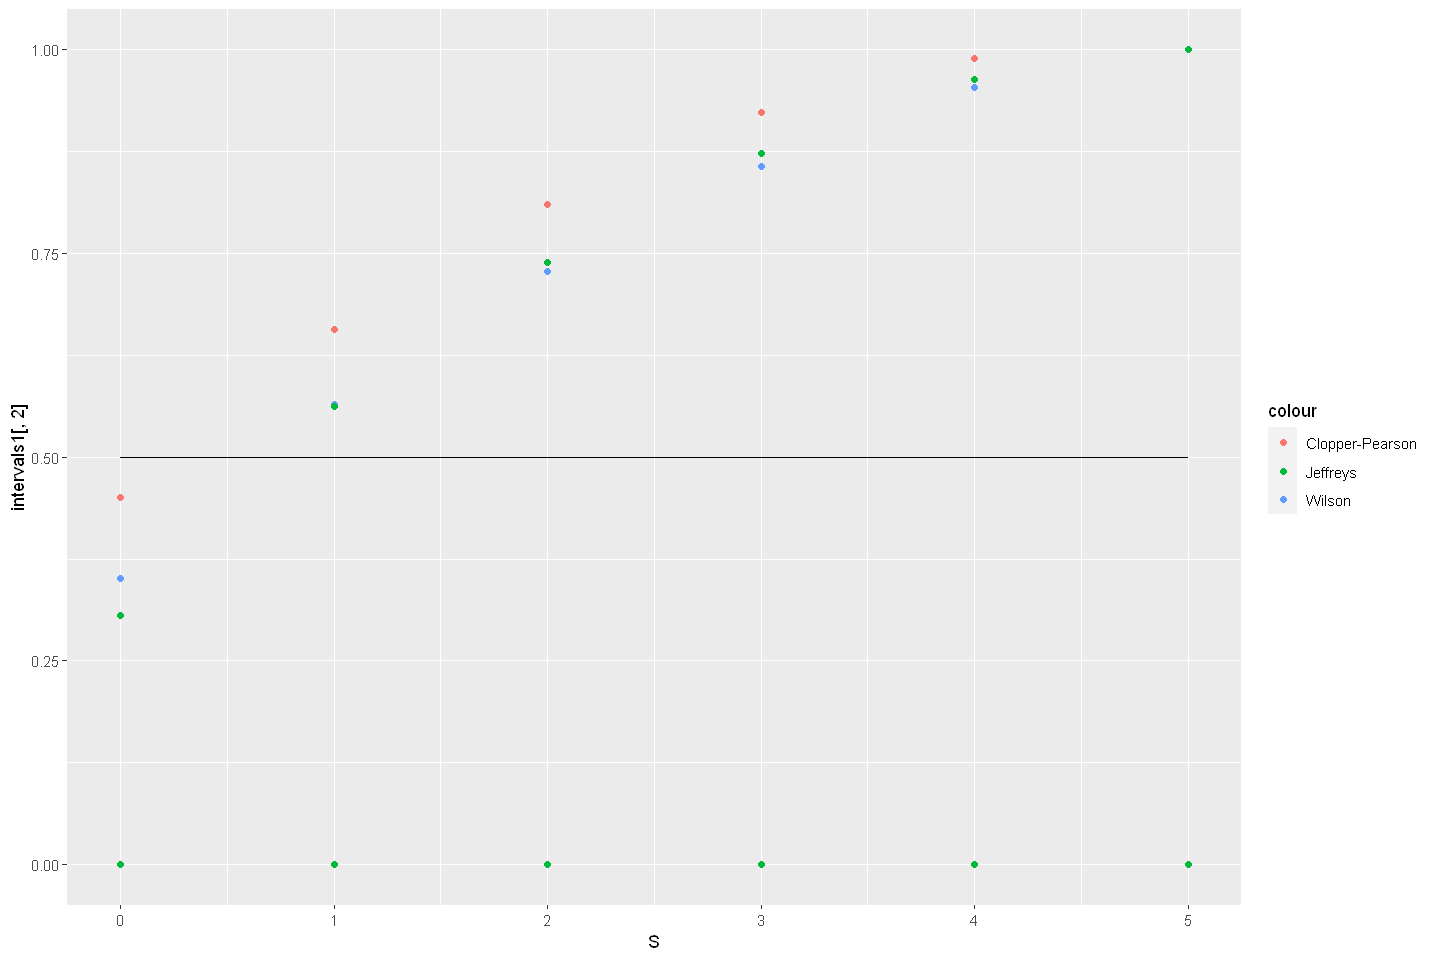

In [25]:
n <- 5
alpha <- 0.05
S <- 0:n

intervals1 <- BinomCI(S, n, method="wilson", sides="right")
#intervals1
intervals2 <- BinomCI(S, n, method="clopper-pearson", sides="right")
#intervals2
intervals3 <- BinomCI(S, n, method="jeffreys", sides="right")
#intervals3

ggplot() +
  geom_point(aes(S, intervals1[,2], col="Wilson")) + geom_point(aes(S, intervals1[,3], col="Wilson")) +
  geom_point(aes(S, intervals2[,2], col="Clopper-Pearson")) + geom_point(aes(S, intervals2[,3], col="Clopper-Pearson")) +
  geom_point(aes(S, intervals3[,2], col="Jeffreys")) + geom_point(aes(S, intervals3[,3], col="Jeffreys")) +
  geom_line(aes(S, 0.5))